**Loading Libraries**

In [1]:
import pyforest
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**Question:-1**

In [2]:
df= pd.read_csv('student-por.csv', sep=';') #reading the Dataset

<IPython.core.display.Javascript object>

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.shape#Checking for the shape of the dataset

(649, 33)

In [5]:
df.isnull().sum() #Checking for nan values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
df.describe()  #Describing the dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
df1=df.copy()

In [9]:
XY=df1[['G2','G3']] #Taking the last two columns (G2 and G3)into XY.

In [10]:
XY.describe() #Describing the new dataset

,G2,G3
count,649.000000,649.000000
mean,11.570108,11.906009
std,2.913639,3.230656
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,12.000000
75%,13.000000,14.000000
max,19.000000,19.000000


In [11]:
X = XY[['G2']] #Dividing XY into X consisting of G2 and Y consisting of G3. Print the shape of both.
Y = XY[['G3']]

In [12]:
X.shape

(649, 1)

In [13]:
Y.shape

(649, 1)

In [14]:
XY.insert(0, 'Inserting', 1) #Inserting a new Column in the dataset

In [15]:
XY.head()

,Inserting,G2,G3
0,1,11,11
1,1,11,11
2,1,13,12
3,1,14,14
4,1,13,13


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Training the dataset and applying the Linear regression

In [17]:
model=LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_test)

In [20]:
# Predicting the Mean Squared error
mse=mean_squared_error(y_test,y_pred)

In [21]:
print("Mean squared error =",mse)

Mean squared error = 2.1899595282476993


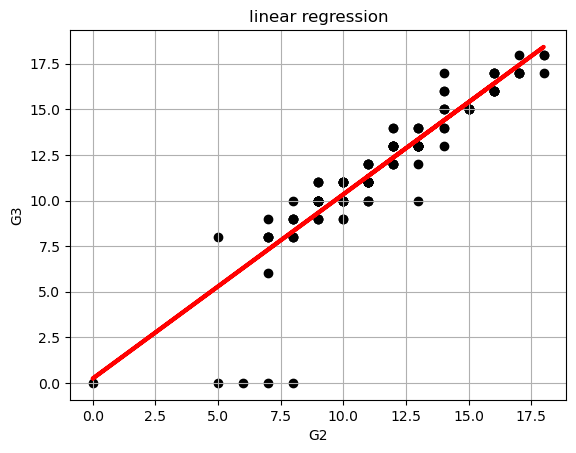

In [22]:
#Plotting the graph of the linear regression
plt.scatter(X_test,y_test,color='Black')
plt.plot(X_test,y_pred,linewidth=3,color='Red')
plt.xlabel("G2")
plt.ylabel("G3")
plt.title("linear regression")
plt.grid()
plt.show()

In [23]:
x = np.array(df1['G2'])
y=np.array(df1['G3'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [25]:
# Gradient Descent Function
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, 
                     stopping_threshold = 1e-6):     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters 
    for i in range(iterations):

        y_predicted = (current_weight * x) + current_bias

        current_cost = mean_squared_error(y, y_predicted)
 
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias

In [26]:
X=df['G2'].values
Y=df['G3'].values

In [27]:
X_train

,G2
133,12
362,11
70,11
19,12
354,12
...,...
232,13
171,10
595,17
317,12


In [28]:
y_train

,G3
133,13
362,13
70,11
19,12
354,15
...,...
232,13
171,11
595,17
317,12


<IPython.core.display.Javascript object>

Iteration 1: Cost 124.10532033898305, Weight         0.12640733744221871, Bias 0.012147799691833586


<IPython.core.display.Javascript object>

Iteration 2: Cost 117.18629522145, Weight         0.15205792170473476, Bias 0.014234062675237719


<IPython.core.display.Javascript object>

Iteration 3: Cost 110.65814356115341, Weight         0.17697343898004042, Bias 0.01626055240073631


<IPython.core.display.Javascript object>

Iteration 4: Cost 104.49878391496817, Weight         0.20117495400179936, Bias 0.018228981783845962


<IPython.core.display.Javascript object>

Iteration 5: Cost 98.68738227707, Weight         0.2246829278539241, Bias 0.020141014653252055


<IPython.core.display.Javascript object>

Iteration 6: Cost 93.20428160800604, Weight         0.2475172352693002, Bias 0.0219982671574847


<IPython.core.display.Javascript object>

Iteration 7: Cost 88.03093534484898, Weight         0.2696971814327829, Bias 0.023802309131283655


<IPython.core.display.Javascript object>

Iteration 8: Cost 83.14984466753269, Weight         0.29124151830267236, Bias 0.025554665422807547


<IPython.core.display.Javascript object>

Iteration 9: Cost 78.54449930917335, Weight         0.3121684604644662, Bias 0.027256817182809343


<IPython.core.display.Javascript object>

Iteration 10: Cost 74.1993217101673, Weight         0.3324957005302924, Bias 0.028910203116868104


<IPython.core.display.Javascript object>

Iteration 11: Cost 70.09961432716696, Weight         0.35224042409704326, Bias 0.03051622070173565


<IPython.core.display.Javascript object>

Iteration 12: Cost 66.23150991870753, Weight         0.3714193242758543, Bias 0.03207622736682652


<IPython.core.display.Javascript object>

Iteration 13: Cost 62.5819246393263, Weight         0.3900486158052148, Bias 0.03359154164185012


<IPython.core.display.Javascript object>

Iteration 14: Cost 59.138513783515215, Weight         0.40814404875964005, Bias 0.03506344427155522


<IPython.core.display.Javascript object>

Iteration 15: Cost 55.8896300298109, Weight         0.42572092186549537, Bias 0.036493179298529535


<IPython.core.display.Javascript object>

Iteration 16: Cost 52.82428404378312, Weight         0.4427940954352307, Bias 0.03788195511496936


<IPython.core.display.Javascript object>

Iteration 17: Cost 49.93210730666129, Weight         0.45937800393095934, Bias 0.039230945484309034


<IPython.core.display.Javascript object>

Iteration 18: Cost 47.20331704386718, Weight         0.4754866681680048, Bias 0.04054129053357348


<IPython.core.display.Javascript object>

Iteration 19: Cost 44.62868313482468, Weight         0.4911337071687306, Bias 0.0418140977172931


<IPython.core.display.Javascript object>

Iteration 20: Cost 42.19949689211914, Weight         0.5063323496766772, Bias 0.04305044275379587


<IPython.core.display.Javascript object>

Iteration 21: Cost 39.907541604402084, Weight         0.5210954453407389, Bias 0.04425137053466817


<IPython.core.display.Javascript object>

Iteration 22: Cost 37.74506474340251, Weight         0.5354354755788382, Bias 0.045417896008153345


<IPython.core.display.Javascript object>

Iteration 23: Cost 35.70475174103562, Weight         0.5493645641302791, Bias 0.04655100503723476


<IPython.core.display.Javascript object>

Iteration 24: Cost 33.77970124790965, Weight         0.5628944873057047, Bias 0.04765165523312893


<IPython.core.display.Javascript object>

Iteration 25: Cost 31.96340178954314, Weight         0.5760366839433213, Bias 0.048720776764893226


<IPython.core.display.Javascript object>

Iteration 26: Cost 30.249709741332314, Weight         0.5888022650798096, Bias 0.04975927314583288


<IPython.core.display.Javascript object>

Iteration 27: Cost 28.632828547768906, Weight         0.6012020233440962, Bias 0.05076802199737188


<IPython.core.display.Javascript object>

Iteration 28: Cost 27.1072891156177, Weight         0.61324644208193, Bias 0.05174787579103379


<IPython.core.display.Javascript object>

Iteration 29: Cost 25.667931314733664, Weight         0.624945704218976, Bias 0.05269966256915965


<IPython.core.display.Javascript object>

Iteration 30: Cost 24.309886523945345, Weight         0.6363097008699206, Bias 0.053624186644972385


<IPython.core.display.Javascript object>

Iteration 31: Cost 23.028561162966003, Weight         0.6473480397008662, Bias 0.05452222928257953


<IPython.core.display.Javascript object>

Iteration 32: Cost 21.819621154629356, Weight         0.658070053052087, Bias 0.05539454935748917


<IPython.core.display.Javascript object>

Iteration 33: Cost 20.67897726489329, Weight         0.66848480582801, Bias 0.05624188399819761


<IPython.core.display.Javascript object>

Iteration 34: Cost 19.602771271024533, Weight         0.6786011031610948, Bias 0.05706494920939102


<IPython.core.display.Javascript object>

Iteration 35: Cost 18.58736291117783, Weight         0.6884274978560906, Bias 0.05786444047728823


<IPython.core.display.Javascript object>

Iteration 36: Cost 17.629317571226927, Weight         0.6979722976209635, Bias 0.05864103335763611


<IPython.core.display.Javascript object>

Iteration 37: Cost 16.725394667197982, Weight         0.7072435720906076, Bias 0.05939538404685493


<IPython.core.display.Javascript object>

Iteration 38: Cost 15.87253668400912, Weight         0.7162491596492794, Bias 0.060128129936816474


<IPython.core.display.Javascript object>

Iteration 39: Cost 15.067858833439624, Weight         0.7249966740575211, Bias 0.06083989015372389


<IPython.core.display.Javascript object>

Iteration 40: Cost 14.308639296347003, Weight         0.7334935108891784, Bias 0.06153126608154895


<IPython.core.display.Javascript object>

Iteration 41: Cost 13.592310016126198, Weight         0.7417468537839521, Bias 0.062202841870469205


<IPython.core.display.Javascript object>

Iteration 42: Cost 12.916448012269786, Weight         0.7497636805207716, Bias 0.06285518493073496


<IPython.core.display.Javascript object>

Iteration 43: Cost 12.278767184647629, Weight         0.7575507689171247, Bias 0.06348884641238349


<IPython.core.display.Javascript object>

Iteration 44: Cost 11.677110580783491, Weight         0.7651147025593301, Bias 0.0641043616712062


<IPython.core.display.Javascript object>

Iteration 45: Cost 11.109443099973273, Weight         0.772461876368599, Bias 0.06470225072136256


<IPython.core.display.Javascript object>

Iteration 46: Cost 10.573844609566121, Weight         0.77959850200759, Bias 0.06528301867502358


<IPython.core.display.Javascript object>

Iteration 47: Cost 10.068503450124553, Weight         0.7865306131320294, Bias 0.06584715616941647


<IPython.core.display.Javascript object>

Iteration 48: Cost 9.59171030749466, Weight         0.7932640704918364, Bias 0.06639513978163146


<IPython.core.display.Javascript object>

Iteration 49: Cost 9.14185243105885, Weight         0.7998045668860656, Bias 0.06692743243154163


<IPython.core.display.Javascript object>

Iteration 50: Cost 8.71740817861421, Weight         0.806157631975856, Bias 0.06744448377317629


<IPython.core.display.Javascript object>

Iteration 51: Cost 8.316941869424754, Weight         0.8123286369594571, Bias 0.06794673057487875


<IPython.core.display.Javascript object>

Iteration 52: Cost 7.939098928037878, Weight         0.818322799113282, Bias 0.06843459708857008


<IPython.core.display.Javascript object>

Iteration 53: Cost 7.582601302439078, Weight         0.8241451862028283, Bias 0.06890849540843076


<IPython.core.display.Javascript object>

Iteration 54: Cost 7.2462431410468975, Weight         0.8298007207671965, Bias 0.06936882581930376


<IPython.core.display.Javascript object>

Iteration 55: Cost 6.928886713925427, Weight         0.8352941842808262, Bias 0.06981597713511344


<IPython.core.display.Javascript object>

Iteration 56: Cost 6.629458564418014, Weight         0.8406302211959712, Bias 0.07025032702758634


<IPython.core.display.Javascript object>

Iteration 57: Cost 6.346945878185033, Weight         0.8458133428693286, Bias 0.07067224234555199


<IPython.core.display.Javascript object>

Iteration 58: Cost 6.080393057364029, Weight         0.850847931376144, Bias 0.07108207942509343


<IPython.core.display.Javascript object>

Iteration 59: Cost 5.828898488264284, Weight         0.8557382432150153, Bias 0.0714801843908098


<IPython.core.display.Javascript object>

Iteration 60: Cost 5.591611491662659, Weight         0.8604884129065294, Bias 0.0718668934484458


<IPython.core.display.Javascript object>

Iteration 61: Cost 5.367729445385012, Weight         0.8651024564887722, Bias 0.0722425331691351


<IPython.core.display.Javascript object>

Iteration 62: Cost 5.156495069440355, Weight         0.8695842749126685, Bias 0.07260742076549845


<IPython.core.display.Javascript object>

Iteration 63: Cost 4.957193864524744, Weight         0.8739376573400228, Bias 0.0729618643598294


<IPython.core.display.Javascript object>

Iteration 64: Cost 4.769151695230674, Weight         0.8781662843470469, Bias 0.07330616324459496


<IPython.core.display.Javascript object>

Iteration 65: Cost 4.591732509787117, Weight         0.882273731036086, Bias 0.07364060813547085


<IPython.core.display.Javascript object>

Iteration 66: Cost 4.424336188617341, Weight         0.8862634700581711, Bias 0.07396548141712574


<IPython.core.display.Javascript object>

Iteration 67: Cost 4.266396514437162, Weight         0.8901388745489554, Bias 0.07428105738196195


<IPython.core.display.Javascript object>

Iteration 68: Cost 4.117379257027606, Weight         0.8939032209805152, Bias 0.07458760246201464


<IPython.core.display.Javascript object>

Iteration 69: Cost 3.976780366203601, Weight         0.8975596919314279, Bias 0.07488537545420554


<IPython.core.display.Javascript object>

Iteration 70: Cost 3.8441242668665447, Weight         0.901111378777467, Bias 0.07517462773914148


<IPython.core.display.Javascript object>

Iteration 71: Cost 3.718962250373714, Weight         0.9045612843051914, Bias 0.07545560349364296


<IPython.core.display.Javascript object>

Iteration 72: Cost 3.6008709567833295, Weight         0.9079123252506363, Bias 0.07572853989718223


<IPython.core.display.Javascript object>

Iteration 73: Cost 3.4894509428414824, Weight         0.9111673347652536, Bias 0.07599366733240556


<IPython.core.display.Javascript object>

Iteration 74: Cost 3.3843253308671737, Weight         0.9143290648111865, Bias 0.0762512095799091


<IPython.core.display.Javascript object>

Iteration 75: Cost 3.28513853396525, Weight         0.9174001884879022, Bias 0.07650138400743312


<IPython.core.display.Javascript object>

Iteration 76: Cost 3.191555053255402, Weight         0.9203833022921509, Bias 0.0767444017536345


<IPython.core.display.Javascript object>

Iteration 77: Cost 3.1032583430486835, Weight         0.923280928313162, Bias 0.07698046790659295


<IPython.core.display.Javascript object>

Iteration 78: Cost 3.0199497401332134, Weight         0.9260955163649313, Bias 0.0772097816772016


<IPython.core.display.Javascript object>

Iteration 79: Cost 2.9413474535471993, Weight         0.9288294460574049, Bias 0.07743253656758904


<IPython.core.display.Javascript object>

Iteration 80: Cost 2.867185611422309, Weight         0.9314850288083093, Bias 0.07764892053471464


<IPython.core.display.Javascript object>

Iteration 81: Cost 2.7972133616732875, Weight         0.9340645097973276, Bias 0.07785911614927593


<IPython.core.display.Javascript object>

Iteration 82: Cost 2.7311940234919345, Weight         0.9365700698642762, Bias 0.07806330075006206


<IPython.core.display.Javascript object>

Iteration 83: Cost 2.6689042867753363, Weight         0.9390038273528851, Bias 0.07826164659388404


<IPython.core.display.Javascript object>

Iteration 84: Cost 2.610133456780483, Weight         0.9413678399017417, Bias 0.07845432100120847


<IPython.core.display.Javascript object>

Iteration 85: Cost 2.5546827414502538, Weight         0.943664106183911, Bias 0.07864148649761772


<IPython.core.display.Javascript object>

Iteration 86: Cost 2.5023645790001923, Weight         0.945894567596704, Bias 0.07882330095121651


<IPython.core.display.Javascript object>

Iteration 87: Cost 2.4530020034916404, Weight         0.9480611099030233, Bias 0.07899991770610064


<IPython.core.display.Javascript object>

Iteration 88: Cost 2.406428046245236, Weight         0.9501655648256716, Bias 0.07917148571200108


<IPython.core.display.Javascript object>

Iteration 89: Cost 2.362485171070144, Weight         0.9522097115959731, Bias 0.07933814965021277


<IPython.core.display.Javascript object>

Iteration 90: Cost 2.3210247413985994, Weight         0.9541952784580159, Bias 0.07950005005591472


<IPython.core.display.Javascript object>

Iteration 91: Cost 2.2819065175233977, Weight         0.9561239441297879, Bias 0.07965732343698483


<IPython.core.display.Javascript object>

Iteration 92: Cost 2.244998182237726, Weight         0.9579973392224405, Bias 0.07981010238940973


<IPython.core.display.Javascript object>

Iteration 93: Cost 2.2101748932728187, Weight         0.959817047618881, Bias 0.07995851570938754


<IPython.core.display.Javascript object>

Iteration 94: Cost 2.1773188610195517, Weight         0.9615846078128589, Bias 0.08010268850221787


<IPython.core.display.Javascript object>

Iteration 95: Cost 2.1463189501056332, Weight         0.9633015142096778, Bias 0.08024274228807159


<IPython.core.display.Javascript object>

Iteration 96: Cost 2.117070303480708, Weight         0.964969218389633, Bias 0.0803787951047294


<IPython.core.display.Javascript object>

Iteration 97: Cost 2.089473987737869, Weight         0.9665891303352434, Bias 0.08051096160737632


<IPython.core.display.Javascript object>

Iteration 98: Cost 2.0634366584718653, Weight         0.9681626196233143, Bias 0.0806393531655364


<IPython.core.display.Javascript object>

Iteration 99: Cost 2.0388702445420672, Weight         0.9696910165828393, Bias 0.0807640779572295


<IPython.core.display.Javascript object>

Iteration 100: Cost 2.0156916501722373, Weight         0.9711756134197206, Bias 0.08088524106042987


<IPython.core.display.Javascript object>

Iteration 101: Cost 1.9938224738794659, Weight         0.9726176653092583, Bias 0.08100294454190386


<IPython.core.display.Javascript object>

Iteration 102: Cost 1.9731887432814874, Weight         0.9740183914573324, Bias 0.08111728754350173


<IPython.core.display.Javascript object>

Iteration 103: Cost 1.9537206648854517, Weight         0.975378976131174, Bias 0.08122836636597666


<IPython.core.display.Javascript object>

Iteration 104: Cost 1.9353523880117505, Weight         0.9767005696605989, Bias 0.08133627455040178


<IPython.core.display.Javascript object>

Iteration 105: Cost 1.9180217820543926, Weight         0.9779842894105482, Bias 0.08144110295725397


<IPython.core.display.Javascript object>

Iteration 106: Cost 1.9016702263245213, Weight         0.9792312207257586, Bias 0.08154293984323145


<IPython.core.display.Javascript object>

Iteration 107: Cost 1.886242411766186, Weight         0.980442417848363, Bias 0.08164187093586998


<IPython.core.display.Javascript object>

Iteration 108: Cost 1.8716861538737302, Weight         0.9816189048091928, Bias 0.08173797950602076


<IPython.core.display.Javascript object>

Iteration 109: Cost 1.8579522161779327, Weight         0.9827616762935414, Bias 0.08183134643825138


<IPython.core.display.Javascript object>

Iteration 110: Cost 1.8449941437038742, Weight         0.9838716984821151, Bias 0.0819220502992293


<IPython.core.display.Javascript object>

Iteration 111: Cost 1.8327681058371994, Weight         0.9849499098678861, Bias 0.08201016740414567


<IPython.core.display.Javascript object>

Iteration 112: Cost 1.8212327480672665, Weight         0.985997222049537, Bias 0.08209577188123558


<IPython.core.display.Javascript object>

Iteration 113: Cost 1.8103490521056986, Weight         0.9870145205021673, Bias 0.08217893573444948


<IPython.core.display.Javascript object>

Iteration 114: Cost 1.800080203907206, Weight         0.9880026653259144, Bias 0.08225972890432855


<IPython.core.display.Javascript object>

Iteration 115: Cost 1.7903914691462426, Weight         0.9889624919731206, Bias 0.08233821932713557


<IPython.core.display.Javascript object>

Iteration 116: Cost 1.781250075728319, Weight         0.9898948119546626, Bias 0.08241447299229136


<IPython.core.display.Javascript object>

Iteration 117: Cost 1.7726251029385263, Weight         0.9908004135260392, Bias 0.08248855399816515


<IPython.core.display.Javascript object>

Iteration 118: Cost 1.764487376852371, Weight         0.9916800623537985, Bias 0.08256052460626628


<IPython.core.display.Javascript object>

Iteration 119: Cost 1.7568093716551068, Weight         0.9925345021628663, Bias 0.08263044529388289


<IPython.core.display.Javascript object>

Iteration 120: Cost 1.7495651165357922, Weight         0.9933644553653256, Bias 0.0826983748052121


<IPython.core.display.Javascript object>

Iteration 121: Cost 1.742730107841139, Weight         0.9941706236711757, Bias 0.0827643702010251


<IPython.core.display.Javascript object>

Iteration 122: Cost 1.7362812261920146, Weight         0.9949536886815897, Bias 0.08282848690690882


<IPython.core.display.Javascript object>

Iteration 123: Cost 1.7301966582822583, Weight         0.9957143124651713, Bias 0.08289077876012527


<IPython.core.display.Javascript object>

Iteration 124: Cost 1.7244558230952627, Weight         0.9964531381176968, Bias 0.08295129805512795


<IPython.core.display.Javascript object>

Iteration 125: Cost 1.719039302288783, Weight         0.9971707903058179, Bias 0.083010095587774


<IPython.core.display.Javascript object>

Iteration 126: Cost 1.7139287745124834, Weight         0.997867875795183, Bias 0.08306722069826927


<IPython.core.display.Javascript object>

Iteration 127: Cost 1.7091069534360523, Weight         0.998544983963424, Bias 0.08312272131288277


<IPython.core.display.Javascript object>

Iteration 128: Cost 1.7045575292782718, Weight         0.9992026872984429, Bias 0.0831766439844657


<IPython.core.display.Javascript object>

Iteration 129: Cost 1.7002651136392528, Weight         0.9998415418824192, Bias 0.08322903393180933


<IPython.core.display.Javascript object>

Iteration 130: Cost 1.6962151874492448, Weight         1.0004620878619466, Bias 0.08327993507787503


<IPython.core.display.Javascript object>

Iteration 131: Cost 1.6923940518579523, Weight         1.0010648499046972, Bias 0.08332939008692868


<IPython.core.display.Javascript object>

Iteration 132: Cost 1.6887887818982312, Weight         1.0016503376429997, Bias 0.08337744040061103


<IPython.core.display.Javascript object>

Iteration 133: Cost 1.6853871827674491, Weight         1.0022190461047051, Bias 0.08342412627297427


<IPython.core.display.Javascript object>

Iteration 134: Cost 1.68217774857862, Weight         1.0027714561317058, Bias 0.08346948680451467


<IPython.core.display.Javascript object>

Iteration 135: Cost 1.679149623441799, Weight         1.0033080347864614, Bias 0.0835135599752299


<IPython.core.display.Javascript object>

Iteration 136: Cost 1.6762925647440727, Weight         1.0038292357468737, Bias 0.08355638267672899


<IPython.core.display.Javascript object>

Iteration 137: Cost 1.673596908503982, Weight         1.004335499689847, Bias 0.08359799074342222


<IPython.core.display.Javascript object>

Iteration 138: Cost 1.671053536683139, Weight         1.0048272546638561, Bias 0.08363841898281713


<IPython.core.display.Javascript object>

Iteration 139: Cost 1.668653846344509, Weight         1.005304916450838, Bias 0.08367770120494633


<IPython.core.display.Javascript object>

Iteration 140: Cost 1.666389720553012, Weight         1.0057688889177123, Bias 0.08371587025095208


<IPython.core.display.Javascript object>

Iteration 141: Cost 1.6642535009200299, Weight         1.0062195643578289, Bias 0.08375295802085163


<IPython.core.display.Javascript object>

Iteration 142: Cost 1.6622379616989382, Weight         1.0066573238226304, Bias 0.08378899550050695


<IPython.core.display.Javascript object>

Iteration 143: Cost 1.660336285344057, Weight         1.0070825374438102, Bias 0.0838240127878216


<IPython.core.display.Javascript object>

Iteration 144: Cost 1.658542039450327, Weight         1.0074955647462385, Bias 0.08385803911818682


<IPython.core.display.Javascript object>

Iteration 145: Cost 1.6568491549957345, Weight         1.0078967549519209, Bias 0.08389110288919846


<IPython.core.display.Javascript object>

Iteration 146: Cost 1.6552519058128692, Weight         1.0082864472752464, Bias 0.08392323168466562


<IPython.core.display.Javascript object>

Iteration 147: Cost 1.6537448892201903, Weight         1.008664971209775, Bias 0.0839544522979312


<IPython.core.display.Javascript object>

Iteration 148: Cost 1.6523230077474793, Weight         1.0090326468068058, Bias 0.08398479075452425


<IPython.core.display.Javascript object>

Iteration 149: Cost 1.650981451893671, Weight         1.009389784945963, Bias 0.08401427233416309


<IPython.core.display.Javascript object>

Iteration 150: Cost 1.6497156838587406, Weight         1.0097366875980276, Bias 0.08404292159212792


<IPython.core.display.Javascript object>

Iteration 151: Cost 1.6485214221946152, Weight         1.0100736480802375, Bias 0.08407076238002102


<IPython.core.display.Javascript object>

Iteration 152: Cost 1.647394627323188, Weight         1.0104009513042707, Bias 0.08409781786593191


<IPython.core.display.Javascript object>

Iteration 153: Cost 1.6463314878724757, Weight         1.0107188740171227, Bias 0.08412411055402474


<IPython.core.display.Javascript object>

Iteration 154: Cost 1.6453284077846595, Weight         1.0110276850350808, Bias 0.0841496623035643


<IPython.core.display.Javascript object>

Iteration 155: Cost 1.644381994152446, Weight         1.0113276454709934, Bias 0.08417449434739684


<IPython.core.display.Javascript object>

Iteration 156: Cost 1.6434890457425646, Weight         1.0116190089550272, Bias 0.08419862730990126


<IPython.core.display.Javascript object>

Iteration 157: Cost 1.6426465421676155, Weight         1.0119020218490968, Bias 0.08422208122442593


<IPython.core.display.Javascript object>

Iteration 158: Cost 1.6418516336696207, Weight         1.0121769234551505, Bias 0.08424487555022576


<IPython.core.display.Javascript object>

Iteration 159: Cost 1.6411016314807374, Weight         1.0124439462174875, Bias 0.08426702918891396


<IPython.core.display.Javascript object>

Iteration 160: Cost 1.6403939987285017, Weight         1.0127033159192758, Bias 0.08428856050044224


<IPython.core.display.Javascript object>

Iteration 161: Cost 1.6397263418548773, Weight         1.0129552518734402, Bias 0.08430948731862326


<IPython.core.display.Javascript object>

Iteration 162: Cost 1.639096402520056, Weight         1.0131999671080794, Bias 0.08432982696620801


<IPython.core.display.Javascript object>

Iteration 163: Cost 1.6385020499636307, Weight         1.0134376685465691, Bias 0.0843495962695314


<IPython.core.display.Javascript object>

Iteration 164: Cost 1.637941273797309, Weight         1.0136685571825048, Bias 0.08436881157273783


<IPython.core.display.Javascript object>

Iteration 165: Cost 1.6374121772047838, Weight         1.0138928282496307, Bias 0.08438748875159942


<IPython.core.display.Javascript object>

Iteration 166: Cost 1.6369129705257632, Weight         1.0141106713868988, Bias 0.08440564322693801


<IPython.core.display.Javascript object>

Iteration 167: Cost 1.6364419652024482, Weight         1.0143222707987989, Bias 0.08442328997766266


<IPython.core.display.Javascript object>

Iteration 168: Cost 1.635997568068, Weight         1.0145278054110929, Bias 0.08444044355343348


<IPython.core.display.Javascript object>

Iteration 169: Cost 1.6355782759576523, Weight         1.0147274490220868, Bias 0.08445711808696259


<IPython.core.display.Javascript object>

Iteration 170: Cost 1.6351826706242714, Weight         1.0149213704495677, Bias 0.08447332730596249


<IPython.core.display.Javascript object>

Iteration 171: Cost 1.6348094139411373, Weight         1.01510973367353, Bias 0.08448908454475221


<IPython.core.display.Javascript object>

Iteration 172: Cost 1.6344572433757354, Weight         1.0152926979748116, Bias 0.08450440275553062


<IPython.core.display.Javascript object>

Iteration 173: Cost 1.6341249677192506, Weight         1.015470418069757, Bias 0.08451929451932685


<IPython.core.display.Javascript object>

Iteration 174: Cost 1.6338114630573035, Weight         1.0156430442410211, Bias 0.08453377205663691


<IPython.core.display.Javascript object>

Iteration 175: Cost 1.6335156689683186, Weight         1.0158107224646258, Bias 0.08454784723775538


<IPython.core.display.Javascript object>

Iteration 176: Cost 1.6332365849366535, Weight         1.0159735945333737, Bias 0.0845615315928111


<IPython.core.display.Javascript object>

Iteration 177: Cost 1.632973266968356, Weight         1.016131798176727, Bias 0.08457483632151531


<IPython.core.display.Javascript object>

Iteration 178: Cost 1.6327248243981127, Weight         1.01628546717725, Bias 0.08458777230263036


<IPython.core.display.Javascript object>

Iteration 179: Cost 1.6324904168765746, Weight         1.0164347314837148, Bias 0.08460035010316706


<IPython.core.display.Javascript object>

Iteration 180: Cost 1.6322692515278814, Weight         1.0165797173209654, Bias 0.08461257998731862


<IPython.core.display.Javascript object>

Iteration 181: Cost 1.6320605802677624, Weight         1.0167205472966347, Bias 0.08462447192513838


<IPython.core.display.Javascript object>

Iteration 182: Cost 1.631863697273142, Weight         1.0168573405048023, Bias 0.08463603560096893


<IPython.core.display.Javascript object>

Iteration 183: Cost 1.6316779365947005, Weight         1.0169902126266814, Bias 0.08464728042162976


<IPython.core.display.Javascript object>

Iteration 184: Cost 1.6315026699043016, Weight         1.0171192760284222, Bias 0.08465821552437017


<IPython.core.display.Javascript object>

Iteration 185: Cost 1.6313373043696737, Weight         1.0172446398561097, Bias 0.08466884978459428


<IPython.core.display.Javascript object>

Iteration 186: Cost 1.6311812806491615, Weight         1.017366410128042, Bias 0.08467919182336478


<IPython.core.display.Javascript object>

Iteration 187: Cost 1.6310340709997513, Weight         1.0174846898243624, Bias 0.08468925001469149


<IPython.core.display.Javascript object>

Iteration 188: Cost 1.6308951774919853, Weight         1.0175995789741237, Bias 0.08469903249261117


<IPython.core.display.Javascript object>

Iteration 189: Cost 1.6307641303257152, Weight         1.0177111747398568, Bias 0.08470854715806436


<IPython.core.display.Javascript object>

Iteration 190: Cost 1.6306404862410102, Weight         1.0178195714997174, Bias 0.08471780168557524


<IPython.core.display.Javascript object>

Iteration 191: Cost 1.6305238270188243, Weight         1.017924860927276, Bias 0.08472680352974002


<IPython.core.display.Javascript object>

Iteration 192: Cost 1.6304137580663804, Weight         1.018027132069024, Bias 0.08473555993152931


<IPython.core.display.Javascript object>

Iteration 193: Cost 1.6303099070824578, Weight         1.0181264714196574, Bias 0.08474407792441009


<IPython.core.display.Javascript object>

Iteration 194: Cost 1.6302119227980834, Weight         1.0182229629952033, Bias 0.08475236434029201


<IPython.core.display.Javascript object>

Iteration 195: Cost 1.6301194737883717, Weight         1.0183166884040504, Bias 0.08476042581530346


<IPython.core.display.Javascript object>

Iteration 196: Cost 1.6300322473514757, Weight         1.018407726915945, Bias 0.08476826879540203


<IPython.core.display.Javascript object>

Iteration 197: Cost 1.6299499484508786, Weight         1.0184961555290093, Bias 0.0847758995418242


<IPython.core.display.Javascript object>

Iteration 198: Cost 1.629872298717431, Weight         1.0185820490348383, Bias 0.0847833241363789


<IPython.core.display.Javascript object>

Iteration 199: Cost 1.629799035507772, Weight         1.0186654800817327, Bias 0.08479054848658935


<IPython.core.display.Javascript object>

Iteration 200: Cost 1.629729911015935, Weight         1.0187465192361191, Bias 0.08479757833068749


<IPython.core.display.Javascript object>

Iteration 201: Cost 1.6296646914351478, Weight         1.0188252350422093, Bias 0.08480441924246541


<IPython.core.display.Javascript object>

Iteration 202: Cost 1.6296031561669837, Weight         1.0189016940799518, Bias 0.08481107663598766


<IPython.core.display.Javascript object>

Iteration 203: Cost 1.6295450970751828, Weight         1.0189759610213203, Bias 0.08481755577016853


<IPython.core.display.Javascript object>

Iteration 204: Cost 1.6294903177816402, Weight         1.0190480986849908, Bias 0.08482386175321817


<IPython.core.display.Javascript object>

Iteration 205: Cost 1.62943863300215, Weight         1.019118168089452, Bias 0.08482999954696133


<IPython.core.display.Javascript object>

Iteration 206: Cost 1.6293898679196877, Weight         1.0191862285045923, Bias 0.0848359739710323


<IPython.core.display.Javascript object>

Iteration 207: Cost 1.6293438575930885, Weight         1.0192523375018092, Bias 0.08484178970694967


<IPython.core.display.Javascript object>

Iteration 208: Cost 1.629300446399139, Weight         1.0193165510026831, Bias 0.0848474513020742


<IPython.core.display.Javascript object>

Iteration 209: Cost 1.6292594875061779, Weight         1.019378923326256, Bias 0.08485296317345349


<IPython.core.display.Javascript object>

Iteration 210: Cost 1.6292208423774415, Weight         1.019439507234955, Bias 0.08485832961155629


<IPython.core.display.Javascript object>

Iteration 211: Cost 1.6291843803024633, Weight         1.0194983539791997, Bias 0.08486355478389984


<IPython.core.display.Javascript object>

Iteration 212: Cost 1.6291499779549456, Weight         1.019555513340733, Bias 0.08486864273857332


<IPython.core.display.Javascript object>

Iteration 213: Cost 1.6291175189756075, Weight         1.019611033674707, Bias 0.08487359740766026


<IPython.core.display.Javascript object>

Iteration 214: Cost 1.6290868935786058, Weight         1.0196649619505662, Bias 0.0848784226105629


<IPython.core.display.Javascript object>

Iteration 215: Cost 1.6290579981801778, Weight         1.0197173437917564, Bias 0.0848831220572313


<IPython.core.display.Javascript object>

Iteration 216: Cost 1.629030735048274, Weight         1.0197682235142975, Bias 0.08488769935129988


<IPython.core.display.Javascript object>

Iteration 217: Cost 1.6290050119719786, Weight         1.0198176441642504, Bias 0.08489215799313413


<IPython.core.display.Javascript object>

Iteration 218: Cost 1.6289807419496072, Weight         1.0198656475541092, Bias 0.08489650138278994


<IPython.core.display.Javascript object>

Iteration 219: Cost 1.6289578428944222, Weight         1.0199122742981526, Bias 0.08490073282288817


<IPython.core.display.Javascript object>

Iteration 220: Cost 1.6289362373569778, Weight         1.0199575638467797, Bias 0.08490485552140685


<IPython.core.display.Javascript object>

Iteration 221: Cost 1.6289158522631448, Weight         1.0200015545198646, Bias 0.08490887259439334


<IPython.core.display.Javascript object>

Iteration 222: Cost 1.6288966186669391, Weight         1.0200442835391526, Bias 0.08491278706859876


<IPython.core.display.Javascript object>

Iteration 223: Cost 1.6288784715173121, Weight         1.0200857870597293, Bias 0.08491660188403696


<IPython.core.display.Javascript object>

Iteration 224: Cost 1.6288613494381141, Weight         1.0201261002005884, Bias 0.08492031989647017


<IPython.core.display.Javascript object>

Iteration 225: Cost 1.6288451945204943, Weight         1.0201652570743223, Bias 0.08492394387982333


<IPython.core.display.Javascript object>

Iteration 226: Cost 1.6288299521270184, Weight         1.0202032908159628, Bias 0.0849274765285293


<IPython.core.display.Javascript object>

Iteration 227: Cost 1.628815570706863, Weight         1.0202402336109946, Bias 0.08493092045980694


<IPython.core.display.Javascript object>

Iteration 228: Cost 1.6288020016214408, Weight         1.0202761167225662, Bias 0.0849342782158737


<IPython.core.display.Javascript object>

Iteration 229: Cost 1.6287891989798844, Weight         1.020310970517922, Bias 0.084937552266095


<IPython.core.display.Javascript object>

Iteration 230: Cost 1.6287771194838183, Weight         1.0203448244940754, Bias 0.08494074500907196


<IPython.core.display.Javascript object>

Iteration 231: Cost 1.628765722280903, Weight         1.0203777073027471, Bias 0.08494385877466921


<IPython.core.display.Javascript object>

Iteration 232: Cost 1.6287549688266536, Weight         1.0204096467745887, Bias 0.08494689582598475


<IPython.core.display.Javascript object>

Iteration 233: Cost 1.6287448227540609, Weight         1.0204406699427118, Bias 0.08494985836126319


<IPython.core.display.Javascript object>

Iteration 234: Cost 1.6287352497505811, Weight         1.0204708030655432, Bias 0.08495274851575432


<IPython.core.display.Javascript object>

Iteration 235: Cost 1.628726217442074, Weight         1.0205000716490247, Bias 0.08495556836351831


<IPython.core.display.Javascript object>

Iteration 236: Cost 1.6287176952832985, Weight         1.0205285004681772, Bias 0.08495831991917918


<IPython.core.display.Javascript object>

Iteration 237: Cost 1.6287096544545911, Weight         1.0205561135880465, Bias 0.08496100513962815


<IPython.core.display.Javascript object>

Iteration 238: Cost 1.6287020677643855, Weight         1.0205829343840493, Bias 0.084963625925678


<IPython.core.display.Javascript object>

Iteration 239: Cost 1.628694909557237, Weight         1.0206089855617353, Bias 0.0849661841236701


<IPython.core.display.Javascript object>

Iteration 240: Cost 1.6286881556270418, Weight         1.0206342891759839, Bias 0.08496868152703549


<IPython.core.display.Javascript object>

Iteration 241: Cost 1.6286817831351625, Weight         1.02065886664965, Bias 0.08497111987781099


<IPython.core.display.Javascript object>

Iteration 242: Cost 1.6286757705331734, Weight         1.0206827387916766, Bias 0.08497350086811209


<IPython.core.display.Javascript object>

Iteration 243: Cost 1.6286700974899746, Weight         1.0207059258146867, Bias 0.08497582614156352


<IPython.core.display.Javascript object>

Iteration 244: Cost 1.6286647448230231, Weight         1.0207284473520724, Bias 0.08497809729468883


<IPython.core.display.Javascript object>

Iteration 245: Cost 1.6286596944334453, Weight         1.020750322474594, Bias 0.08498031587826019


<IPython.core.display.Javascript object>

Iteration 246: Cost 1.6286549292448222, Weight         1.020771569706503, Bias 0.08498248339860942


<IPython.core.display.Javascript object>

Iteration 247: Cost 1.6286504331454228, Weight         1.0207922070412034, Bias 0.08498460131890162


<IPython.core.display.Javascript object>

Iteration 248: Cost 1.6286461909337093, Weight         1.0208122519564649, Bias 0.08498667106037208


<IPython.core.display.Javascript object>

Iteration 249: Cost 1.6286421882669189, Weight         1.0208317214291975, Bias 0.08498869400352793


<IPython.core.display.Javascript object>

Iteration 250: Cost 1.628638411612548, Weight         1.0208506319498067, Bias 0.08499067148931526


<IPython.core.display.Javascript object>

Iteration 251: Cost 1.628634848202578, Weight         1.020868999536134, Bias 0.08499260482025281


<IPython.core.display.Javascript object>

Iteration 252: Cost 1.6286314859902893, Weight         1.020886839746999, Bias 0.08499449526153319


<IPython.core.display.Javascript object>

Iteration 253: Cost 1.6286283136095117, Weight         1.0209041676953545, Bias 0.08499634404209253


<IPython.core.display.Javascript object>

Iteration 254: Cost 1.628625320336179, Weight         1.0209209980610627, Bias 0.08499815235564946


<IPython.core.display.Javascript object>

Iteration 255: Cost 1.6286224960520557, Weight         1.020937345103307, Bias 0.08499992136171439


<IPython.core.display.Javascript object>

Iteration 256: Cost 1.6286198312105105, Weight         1.0209532226726463, Bias 0.0850016521865697


<IPython.core.display.Javascript object>

Iteration 257: Cost 1.628617316804227, Weight         1.0209686442227262, Bias 0.0850033459242221


<IPython.core.display.Javascript object>

Iteration 258: Cost 1.6286149443347337, Weight         1.0209836228216522, Bias 0.08500500363732741


<IPython.core.display.Javascript object>

Iteration 259: Cost 1.6286127057836604, Weight         1.0209981711630391, Bias 0.08500662635808907


<IPython.core.display.Javascript object>

Iteration 260: Cost 1.6286105935856146, Weight         1.0210123015767416, Bias 0.08500821508913078


<IPython.core.display.Javascript object>

Iteration 261: Cost 1.6286086006025933, Weight         1.0210260260392794, Bias 0.08500977080434416


<IPython.core.display.Javascript object>

Iteration 262: Cost 1.6286067200998366, Weight         1.0210393561839621, Bias 0.08501129444971212


<IPython.core.display.Javascript object>

Iteration 263: Cost 1.6286049457230485, Weight         1.0210523033107253, Bias 0.08501278694410866


<IPython.core.display.Javascript object>

Iteration 264: Cost 1.6286032714769036, Weight         1.0210648783956833, Bias 0.08501424918007569


<IPython.core.display.Javascript object>

Iteration 265: Cost 1.6286016917047685, Weight         1.021077092100409, Bias 0.08501568202457768


<IPython.core.display.Javascript object>

Iteration 266: Cost 1.628600201069566, Weight         1.0210889547809483, Bias 0.08501708631973456


<IPython.core.display.Javascript object>

Iteration 267: Cost 1.6285987945357254, Weight         1.0211004764965743, Bias 0.08501846288353375


<IPython.core.display.Javascript object>

Iteration 268: Cost 1.6285974673521482, Weight         1.0211116670182931, Bias 0.08501981251052167


<IPython.core.display.Javascript object>

Iteration 269: Cost 1.6285962150361368, Weight         1.021122535837104, Bias 0.08502113597247554


<IPython.core.display.Javascript object>

Iteration 270: Cost 1.6285950333582333, Weight         1.021133092172024, Bias 0.08502243401905583


<IPython.core.display.Javascript object>

Iteration 271: Cost 1.6285939183279128, Weight         1.0211433449778815, Bias 0.08502370737844009


<IPython.core.display.Javascript object>

Iteration 272: Cost 1.6285928661800844, Weight         1.0211533029528872, Bias 0.08502495675793854


<IPython.core.display.Javascript object>

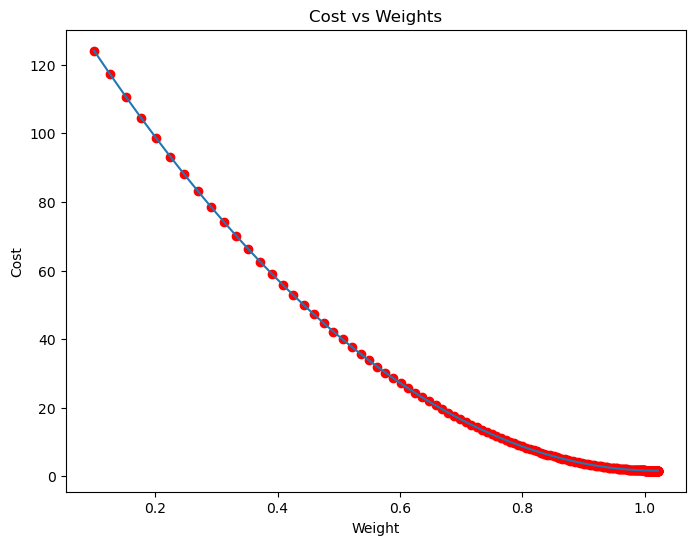

In [29]:
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=1000)


**QUESTION:-2**

In [30]:
#Random text generated from GPT
text_data = "In the heart of a bustling city, there stood a forgotten bookstore tucked away in a corner, its faded sign barely visible amidst the neon lights and towering skyscrapers. Inside, the shelves were lined with dusty tomes, their spines bearing the weight of countless stories waiting to be rediscovered. Among these forgotten treasures, a peculiar book caught the eye of a young woman named Evelyn. Its cover was worn, its pages yellowed with age, yet there was an aura of mystery surrounding it that drew her in. Little did she know, this book held the key to unlocking secrets beyond her wildest imagination. As Evelyn delved deeper into its pages, she found herself transported to a realm where time stood still, where myths and legends walked among mortals, and where her destiny awaited. Guided by the enigmatic words of the book, Evelyn embarked on a journey that would challenge everything she thought she knew about herself and the world around her. Along the way, she encountered allies and adversaries, each with their own motives and desires. As she unraveled the mysteries of the past, Evelyn discovered that her fate was intertwined with a prophecy that foretold the rise of a new era and the fall of an ancient darkness. With each chapter she read, Evelyn grew stronger, her resolve hardened by the trials she faced. But as she neared the end of her journey, she realized that the true test of her strength lay not in defeating her enemies, but in embracing her own inner power and accepting the role she was destined to play. And so, armed with courage and determination, Evelyn set out to fulfill her destiny and shape the future of the world."

**Stemming**

In [31]:
# Cleaning the text
ps= PorterStemmer()
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(text_data)
corpus = [] # After cleaning the sentence that it will store over here. 
for i in range (len(sentences)):
    review = re.sub('[^a-zA-Z]','',sentences[i]) #Removing stop words
    review = review.lower() # lowering all sentence
    review = review.split() # Get list of words. 
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # Stemming
    review = ''.join(review)
    corpus.append(review)

In [32]:
# CountVectorizer
cv = CountVectorizer()
X= cv.fit_transform(corpus).toarray()

In [33]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [34]:
# TF-IDF Vectorizer
cv= TfidfVectorizer()
X_tf_idf= cv.fit_transform(corpus).toarray()

<IPython.core.display.Javascript object>

In [35]:
X_tf_idf

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
# HashingVectorizer
cv = HashingVectorizer()
X_hash = cv.fit_transform(corpus).toarray()

In [37]:
X_hash

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Lemmatizing**

In [38]:
# Cleaning the data / text
ps= PorterStemmer()
wordnet = WordNetLemmatizer()
sentences1 = nltk.sent_tokenize(text_data)
corpus1 = [] # After cleaning the sentence that it will store over here. 
for i in range (len(sentences1)):
    review1 = re.sub('[^a-zA-Z]','',sentences1[i]) #Removing stop words
    review1 = review1.lower() # lowering all sentence
    review1 = review1.split() # Get list of words. 
    review1 = [wordnet.lemmatize(word) for word in review1 if not word in set(stopwords.words('english'))] # Lemmatizing words
    review1 = ''.join(review)
    corpus1.append(review1)

In [39]:
# CountVectorizer
cv1 = CountVectorizer()
X1= cv1.fit_transform(corpus1).toarray()

In [40]:
X1

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [41]:
# TF-IDF Vectorizer
cv1= TfidfVectorizer()
X_tf_idf1= cv.fit_transform(corpus1).toarray()

<IPython.core.display.Javascript object>

In [42]:
X_tf_idf1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# HashingVectorizer
cv1 = HashingVectorizer()
X_hash1 = cv.fit_transform(corpus1).toarray()

In [44]:
X_hash1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])